# Zomato Analysis and Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
df1=pd.read_csv(r"C:\Users\User\Downloads\Country-Code.csv")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
df2=pd.read_csv("Zomato_Res.csv",encoding='Latin-1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
zr=pd.merge(df1,df2)
zr

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [5]:
zr.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [23]:
zr.shape

(9551, 22)

In [24]:
zr.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [25]:
zr.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Data Cleaning:-

In [28]:
zr.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Above observation shows that many features/columns are having null values in the dataset.

In [30]:
zr.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [31]:
zr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [33]:
zr.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [34]:
zr['Country Code'].unique()

array([  1,  14,  30,  37,  94, 148, 162, 166, 184, 189, 191, 208, 214,
       215, 216], dtype=int64)

In [35]:
zr['Country'].unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [36]:
zr['Restaurant ID'].unique()

array([ 3400025,  3400341,  3400005, ..., 17697332, 17694056, 17559793],
      dtype=int64)

In [37]:
zr['Restaurant Name'].unique()

array(['Jahanpanah', 'Rangrezz Restaurant', 'Time2Eat - Mama Chicken',
       ..., 'Tokyo Japanese Steak House',
       "Theo Yianni's Authentic Greek Restaurant",
       "Fishpatrick's Crabby Cafe"], dtype=object)

In [38]:
zr['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag',
       'Armidale', 'Balingup', 'Beechworth', 'Dicky Beach',
       'East Ballina', 'Flaxton', 'Forrest', 'Hepburn Springs',
       'Huskisson', 'Inverloch', 'Lakes Entrance', 'Lorn', 'Macedon',
       'Mayfield', 'Middleton Beach', 'Montville', 'Palm Cove',
       'Paynesville', 'Penola', 'Phillip Island', 'Tanunda',
       'Trentham East', 'Victor Harbor', 'Brasï¿½_lia', 'Rio de Janeiro',
       'Sï¿½ï¿½o Paulo', 'Chatham-Kent', 'Consort', 'Vineland 

In [39]:
zr['Address'].unique()

array(['E 23, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra',
       'E-20, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra',
       'Main Market, Sadar Bazaar, Agra Cantt, Agra', ...,
       '1931 Sears Street, Waterloo, IA 50702',
       '322 American Way, Weirton, WV 26062',
       '196 Bayfront Loop, Winchester Bay, OR 97467'], dtype=object)

In [40]:
zr['Locality'].unique()

array(['Agra Cantt', 'Civil Lines', 'Courtyard by Marriott Agra, Tajganj',
       ..., 'Waterloo', 'Weirton', 'Winchester Bay'], dtype=object)

In [41]:
zr['Locality Verbose'].unique()

array(['Agra Cantt, Agra', 'Civil Lines, Agra',
       'Courtyard by Marriott Agra, Tajganj, Agra', ...,
       'Waterloo, Waterloo', 'Weirton, Weirton',
       'Winchester Bay, Winchester Bay'], dtype=object)

In [42]:
zr['Longitude'].unique()

array([  78.01154444,    0.        ,   78.01160797, ...,  -92.3234    ,
        -80.529488  , -124.175346  ])

In [43]:
zr['Latitude'].unique()

array([27.16166111,  0.        , 27.16083249, ..., 42.46558   ,
       40.396043  , 43.678998  ])

In [44]:
zr['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Coffee and Tea, Desserts, Beverages', 'Sandwich, Sushi, Tapas',
       'Burger, Greek, Sandwich'], dtype=object)

In [45]:
zr['Average Cost for two'].unique()

array([   850,    700,    500,    400,   1000,   2000,   2500,    800,
         3600,      0,    550,   1100,   1500,    900,   1800,    300,
         1400,    350,    450,    600,    950,   1200,    200,    100,
          150,    650,   1300,   2400,    250,   1600,   2200,    750,
         1700,   1250,   1900,   2700,   3500,   5000,   2300,   1750,
         3200,   3000,   2100,   1850,   4500,   4000,   3300,    120,
         1350,   1650,   1950,   1050,    290,     50,   1450,   2800,
          260,   3650,   4800,   1550,    720,   6500,   7000,   1150,
         2900,   2600,   4700,   3700,   3800,   4100,   4300,   2650,
         6000,   5100,   5500,   4400,   4200,   8000,   2350,     20,
            7,     30,     55,     45,     60,     80,     90,    230,
          240,    140,    170,     40,     70,     85,     75,     65,
           25, 150000,  70000, 250000, 200000, 165000, 800000, 500000,
       300000, 450000, 120000, 100000, 350000,     35,    190,    105,
      

In [46]:
zr['Currency'].unique()

array(['Indian Rupees(Rs.)', 'Dollar($)', 'Brazilian Real(R$)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Botswana Pula(P)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)', 'Emirati Diram(AED)', 'Pounds(ï¿½ï¿½)'],
      dtype=object)

In [47]:
zr['Has Table booking'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
zr['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
zr['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
zr['Switch to order menu'].unique()

array(['No'], dtype=object)

In [51]:
zr['Price range'].unique()

array([3, 2, 4, 1], dtype=int64)

In [52]:
zr['Aggregate rating'].unique()

array([3.9, 3.5, 3.6, 4. , 4.2, 4.3, 3.8, 4.1, 3.4, 4.9, 3.7, 4.4, 4.5,
       4.6, 3.3, 3.2, 3.1, 4.7, 4.8, 2.9, 2.8, 3. , 0. , 2.1, 2.7, 2.4,
       2.6, 2.5, 1.8, 2.2, 2. , 2.3, 1.9])

In [53]:
zr['Rating color'].unique()

array(['Yellow', 'Green', 'Orange', 'Dark Green', 'White', 'Red'],
      dtype=object)

In [54]:
zr['Rating text'].unique()

array(['Good', 'Very Good', 'Average', 'Excellent', 'Not rated', 'Poor'],
      dtype=object)

In [55]:
zr['Votes'].unique()

array([ 140,   71,   94, ..., 1868, 1746,  575], dtype=int64)

# EDA:-

Data Visualization:-

In [60]:
country_name=zr.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'South Africa', 'UAE',
       'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Sri Lanka', 'Qatar', 'Singapore', 'Canada'],
      dtype='object')

In [61]:
country_values=zr.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

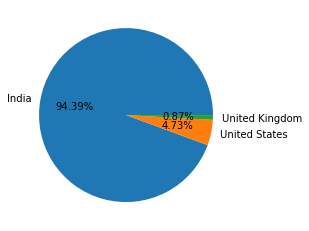

In [62]:
plt.pie(country_values[:3], labels= country_name[:3], autopct='%1.2f%%')
plt.show()

Observation:-

Zomato maximum records or transaction are from India After that USA and then United Kingdoms.

In [64]:
rating=zr.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:"Rating_count"})
rating

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation:-
    
When Rating is between 4.5 to 4.9---> Excellent
When Rating are between 4.0 to 4.4--->very good
when Rating is between 3.5 to 3.9----> good
when Rating is between 3.0 to 3.4----> average
when Rating is between 2.5 to 2.9----> average
when Rating is between 2.0 to 2.4----> Poor

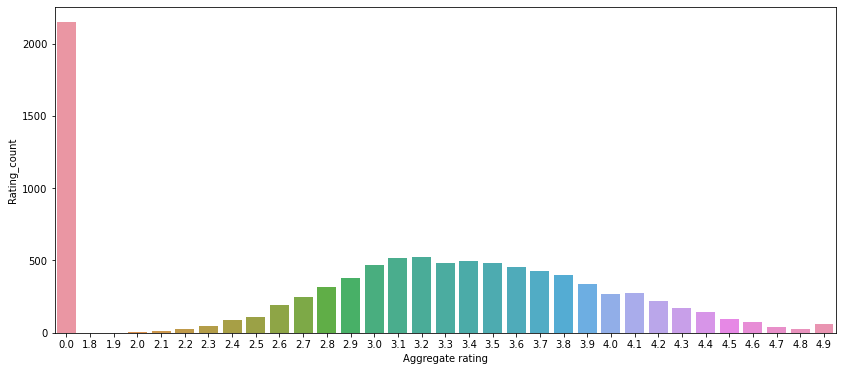

In [66]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(14,6)
sns.barplot(x="Aggregate rating", y="Rating_count", data= rating)
plt.show()

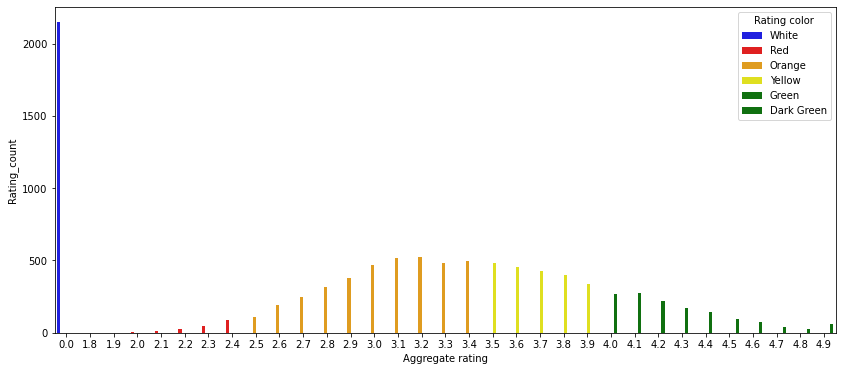

In [67]:
sns.barplot(x="Aggregate rating",y="Rating_count",hue='Rating color',data=rating,palette=['blue','red','orange','yellow','green','green'])
plt.show()

Obersvation:-
    
Not Rated count is very high and 
Maximum number of rating are between 2.5 to 3.4

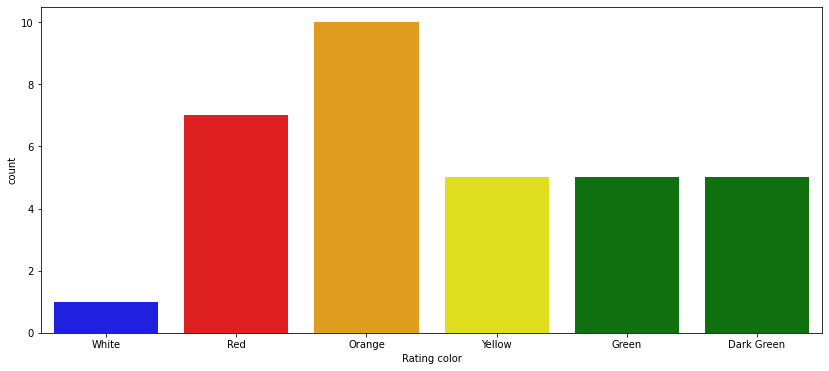

In [68]:
sns.countplot(x="Rating color",data=rating,palette=['blue','red','orange','yellow','green','green'])
plt.show()

In [71]:
# Lets Find the countries name that has given 0 rating:

zero=zr[zr["Rating color"]=="White"].groupby("Country").size().reset_index().rename(columns={0:"Rating_count"})
zero

,Country,Rating_count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Observation:-
    
Maximum number of 0 ratings are from Indian customers

In [73]:
# Lets find the countries which gave the highest rating

Excellent=zr[zr["Rating color"]=="Dark Green"].groupby("Country").size().sort_values(ascending=False).reset_index().rename(columns={0:"Rating_count"})
Excellent

,Country,Rating_count
0,India,116
1,United States,68
2,United Kingdom,23
3,UAE,18
4,Brazil,16
5,New Zealand,12
6,Phillipines,12
7,South Africa,12
8,Turkey,10
9,Indonesia,7


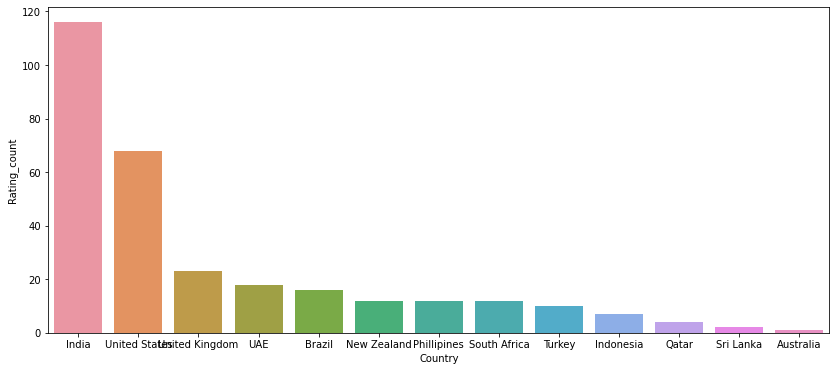

In [74]:
sns.barplot(x="Country", y="Rating_count" ,data=Excellent)
plt.show()

Observation:-
    
Again Indian customers gave the highest rating

In [75]:
# Lets find the countries which gave the poor rating

poor=zr[zr["Rating color"]=="Red"].groupby("Country").size().sort_values(ascending=False).reset_index().rename(columns={0:"Rating_count"})
poor

,Country,Rating_count
0,India,180
1,United States,2
2,Australia,1
3,New Zealand,1
4,Sri Lanka,1
5,UAE,1


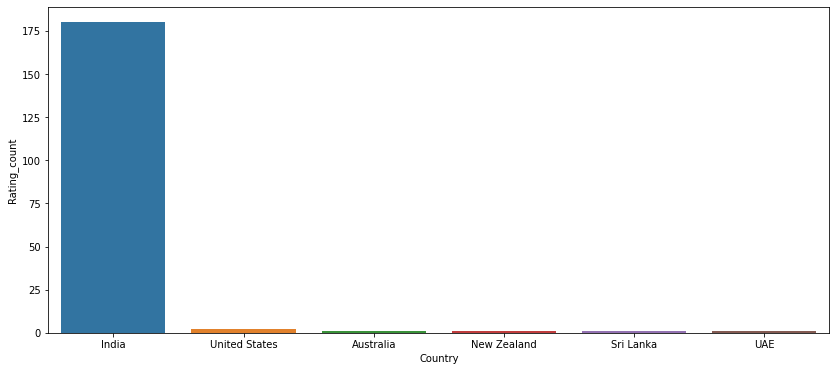

In [76]:
sns.barplot(x="Country", y="Rating_count" ,data=poor)
plt.show()

Observation:-
    
Indian customers are the top community to rate poor

In [77]:
# Find out which currency is used by which country?

zr.groupby(['Country','Currency']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Rating_count"})

,Country,Currency,Rating_count
0,India,Indian Rupees(Rs.),8652
1,United States,Dollar($),434
2,United Kingdom,Pounds(ï¿½ï¿½),80
3,Brazil,Brazilian Real(R$),60
4,South Africa,Rand(R),60
5,UAE,Emirati Diram(AED),60
6,New Zealand,NewZealand($),40
7,Turkey,Turkish Lira(TL),34
8,Australia,Dollar($),24
9,Phillipines,Botswana Pula(P),22


In [78]:
# Which Countries do have online deliveries option?

zr[zr["Has Online delivery"]=="Yes"].groupby("Country").size().reset_index().rename(columns={0:"Rating_count"})

,Country,Rating_count
0,India,2423
1,UAE,28


Observation:-
    
Online Deliveries are available in India and UAE

In [79]:
# To find the top 10 Cuisines in the dataset

cuisines=zr.groupby(["Cuisines"]).size().sort_values(ascending=False).head(10).reset_index().rename(columns={0:"Rating_count"})
cuisines

,Cuisines,Rating_count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


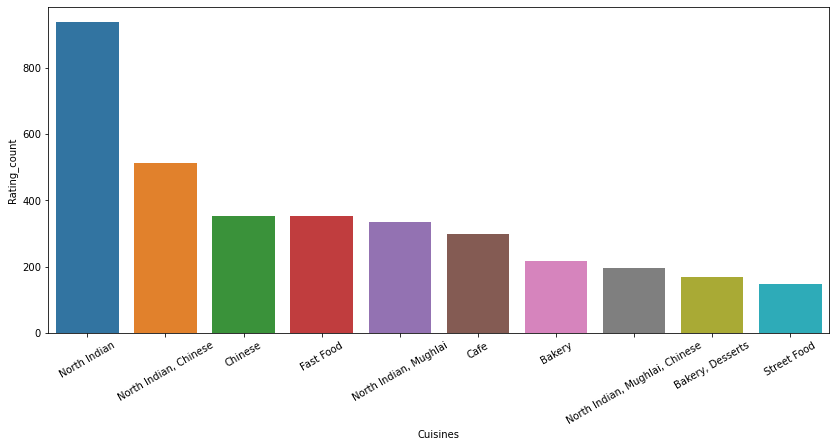

In [80]:
a=sns.barplot(x="Cuisines",y="Rating_count",data=cuisines)
a.set_xticklabels(labels= ["North Indian","North Indian, Chinese","Chinese","Fast Food","North Indian, Mughlai","Cafe","Bakery","North Indian, Mughlai, Chinese","Bakery, Desserts","Street Food"], rotation=30)
plt.show()

Observation:-
    
North Indian and Chinese food are amoung the top cuisine choices

In [81]:
# Top find the top 10 cities as per distribution

city=zr.groupby(["City"]).size().sort_values(ascending=False).head(10).reset_index().rename(columns={0:"Rating_count"})
city

,City,Rating_count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Lucknow,21
7,Amritsar,21
8,Ahmedabad,21
9,Guwahati,21


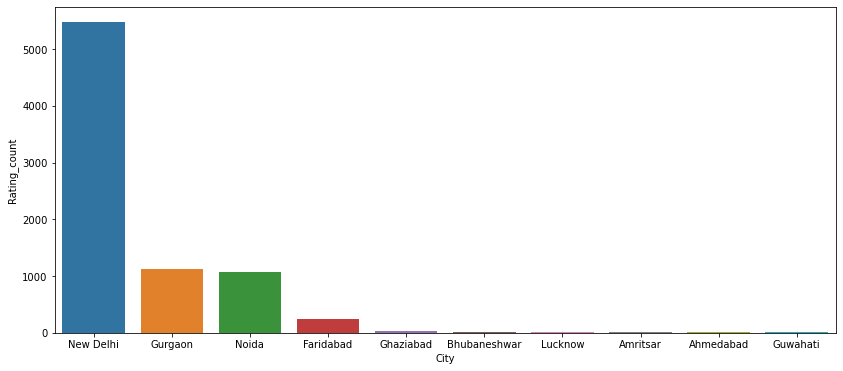

In [82]:
sns.barplot(x="City",y="Rating_count",data=city)
plt.show()

In [83]:
zr.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Lucknow', 'Ahmedabad', 'Guwahati',
       ...
       'Bandung', 'Quezon City', 'Dicky Beach', 'Fernley', 'Mc Millan',
       'Vineland Station', 'Beechworth', 'Cochrane', 'Vernonia',
       'Winchester Bay'],
      dtype='object', length=141)

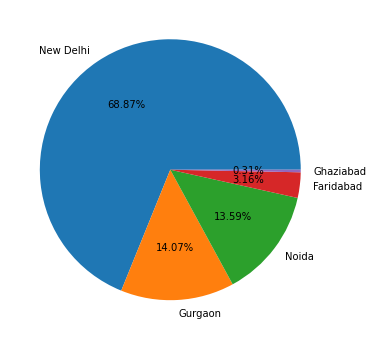

In [84]:
city_values=zr.City.value_counts().values
city_labels=zr.City.value_counts().index
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

In [87]:
# Lets find the top 10 restaurants with their countries as per votes

Rest=zr.groupby(["Votes","Restaurant Name","Country"]).size().reset_index().tail(10).rename(columns={0:"Rating_count"})
Rest

,Votes,Restaurant Name,Country,Rating_count
9320,5288,BarBQ,India,1
9321,5385,The Black Pearl,India,1
9322,5434,AB's - Absolute Barbecues,India,1
9323,5705,Big Brewsky,India,1
9324,5966,Barbeque Nation,India,1
9325,6907,AB's - Absolute Barbecues,India,1
9326,7574,Peter Cat,India,1
9327,7931,Hauz Khas Social,India,1
9328,9667,Truffles,India,1
9329,10934,Toit,India,1


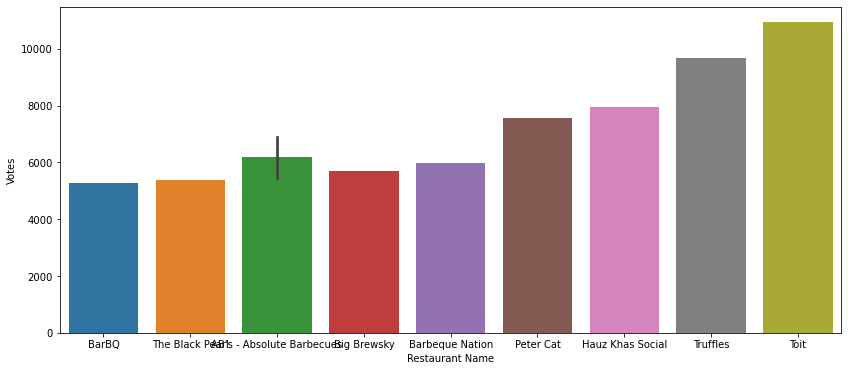

In [90]:
sns.barplot(x="Restaurant Name",y="Votes",data=Rest)
plt.show()

Observation:-
    
Mostly top restaurants are bases in India as per dataset

In [91]:
# To find the city with most rated restaurants

Top=zr.groupby(["Votes","Restaurant Name","City"]).size().reset_index().tail(50).rename(columns={0:"Rating_count"})
Top

,Votes,Restaurant Name,City,Rating_count
9353,2620,Naturals Ice Cream,New Delhi,1
9354,2639,Berco's,New Delhi,1
9355,2662,Joey's Pizza,Mumbai,1
9356,2689,Parikrama - The Revolving Restaurant,New Delhi,1
9357,2724,QD's Restaurant,New Delhi,1
9358,2777,Big Chill,New Delhi,1
9359,2806,Pirates of Grill,Gurgaon,1
9360,2826,Bukhara - ITC Maurya,New Delhi,1
9361,2843,SodaBottleOpenerWala,Gurgaon,1
9362,2847,Barbeque Nation,Pune,1


In [92]:
top_final=Top.groupby(["City"]).size().sort_values(ascending=False).reset_index(name="Rating_count")
top_final

,City,Rating_count
0,New Delhi,26
1,Bangalore,6
2,Gurgaon,4
3,Kolkata,4
4,Mumbai,4
5,Hyderabad,2
6,Tampa Bay,2
7,Chennai,1
8,Pune,1


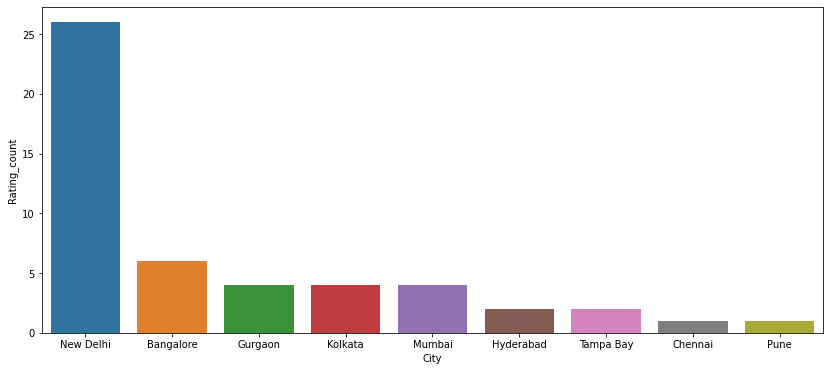

In [93]:
sns.barplot(x="City",y="Rating_count", data= top_final)
plt.show()

Observation:-
    
New Delhi has the most top-rated restaurants followed by Bangalore and Gurgaon

In [6]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

val=['Country','Restaurant Name', 'City','Address', 'Locality', 'Locality Verbose','Cuisines','Currency', 'Has Table booking',
     'Has Online delivery', 'Is delivering now', 'Switch to order menu','Rating color', 'Rating text']
for i in val:
    zr[i]=le.fit_transform(zr[i])

In [8]:
zr

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,3400025,3201,1,4553,17,17,78.011544,27.161661,...,4,0,0,0,0,3,3.9,5,2,140
1,1,3,3400341,5261,1,4605,17,17,0.000000,0.000000,...,4,0,0,0,0,2,3.5,5,2,71
2,1,3,3400005,6919,1,6234,17,17,78.011608,27.160832,...,4,0,0,0,0,2,3.6,5,2,94
3,1,3,3400021,1637,1,100,204,205,77.998092,27.195928,...,4,0,0,0,0,2,4.0,1,5,87
4,1,3,3400017,4922,1,1316,204,205,78.007553,27.201725,...,4,0,0,0,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14,17697389,6794,135,1279,1174,1231,-92.335523,42.498400,...,2,0,0,0,0,1,3.7,5,2,101
9547,216,14,17697424,6839,135,2667,1174,1231,-92.335769,42.497919,...,2,0,0,0,0,1,3.5,5,2,58
9548,216,14,17697332,6945,135,957,1174,1231,-92.323400,42.465580,...,2,0,0,0,0,2,3.9,5,2,156
9549,216,14,17694056,6883,136,1910,1176,1233,-80.529488,40.396043,...,2,0,0,0,0,2,3.9,5,2,156


In [9]:
zr.dtypes

Country Code              int64
Country                   int32
Restaurant ID             int64
Restaurant Name           int32
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

# Correlation:-

In [8]:
# 1. Checking the Correlation with respect to first target variable(Average Cost for two):-

zr.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

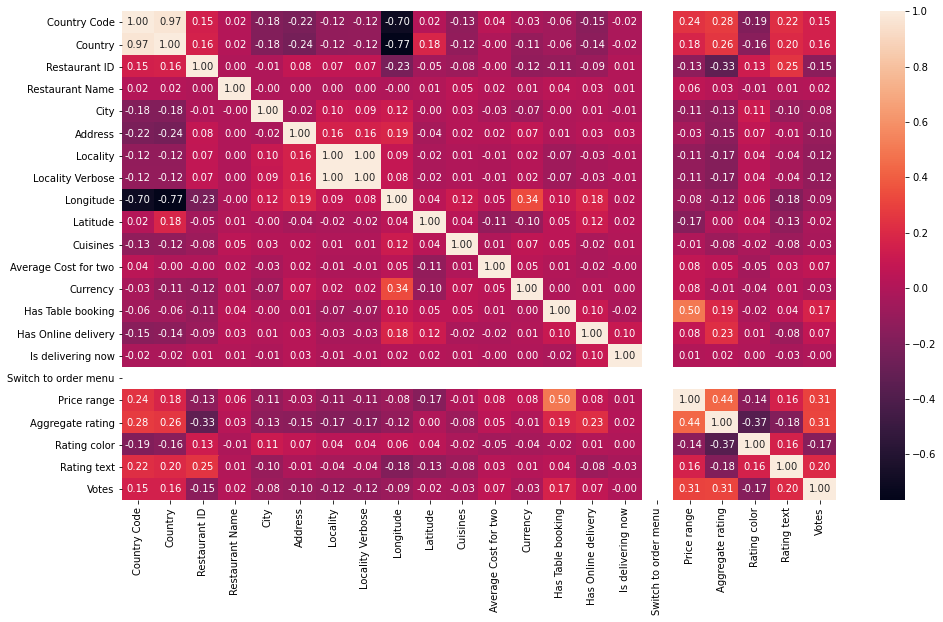

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(zr.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows that 'Country','Is delivering now','Restaurant ID','Cuisines','Switch to order menu ' and 'Has Table booking' 
less correlated with the target variable 'Average Cost for two'.

Making new dataframe in terms of Average cost for two analysis:-

In [10]:
zr_g1=zr.drop(['Country','Is delivering now','Switch to order menu','Restaurant ID','Cuisines','Has Table booking'],axis=1)
zr_g1

,Country Code,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3201,1,4553,17,17,78.011544,27.161661,850,4,0,3,3.9,5,2,140
1,1,5261,1,4605,17,17,0.000000,0.000000,700,4,0,2,3.5,5,2,71
2,1,6919,1,6234,17,17,78.011608,27.160832,500,4,0,2,3.6,5,2,94
3,1,1637,1,100,204,205,77.998092,27.195928,400,4,0,2,4.0,1,5,87
4,1,4922,1,1316,204,205,78.007553,27.201725,1000,4,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,6794,135,1279,1174,1231,-92.335523,42.498400,10,2,0,1,3.7,5,2,101
9547,216,6839,135,2667,1174,1231,-92.335769,42.497919,10,2,0,1,3.5,5,2,58
9548,216,6945,135,957,1174,1231,-92.323400,42.465580,25,2,0,2,3.9,5,2,156
9549,216,6883,136,1910,1176,1233,-80.529488,40.396043,25,2,0,2,3.9,5,2,156


In [11]:
zr_g1.shape

(9551, 16)

In [12]:
# checking for the skewness:-

zr_g1.skew()

Country Code             3.043965
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253550
Locality Verbose        -0.183059
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Currency                 2.858093
Has Online delivery      1.114620
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

Above observations shows that 'Average Cost for two' and 'Votes' are higly skewed.

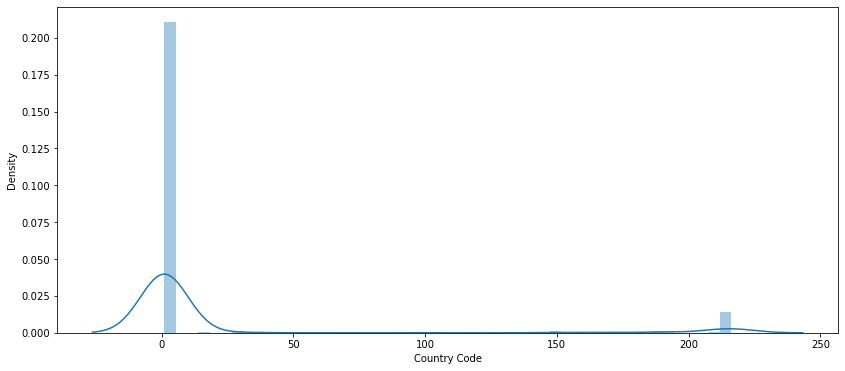

In [106]:
# checking with the distribution curve:-

sns.distplot(zr_g1['Country Code'])
plt.show()

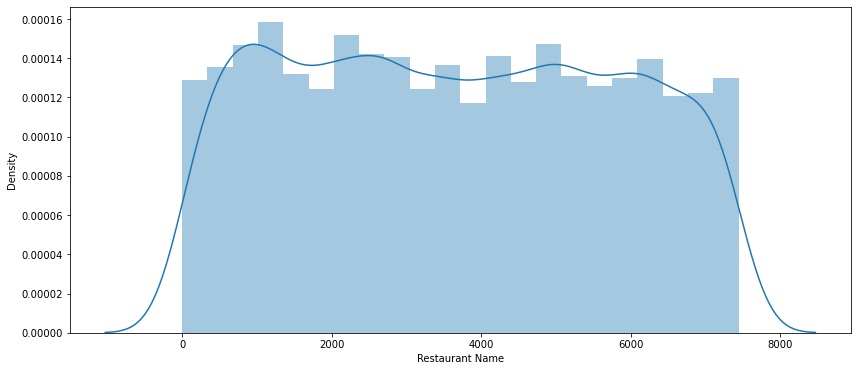

In [107]:
sns.distplot(zr_g1['Restaurant Name'])
plt.show()

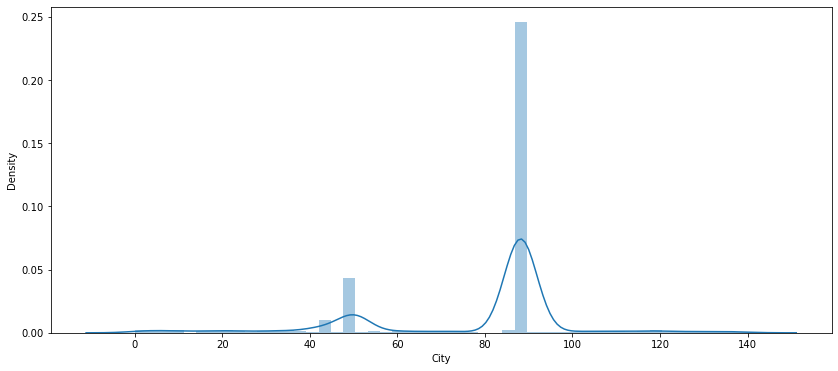

In [108]:
sns.distplot(zr_g1['City'])
plt.show()

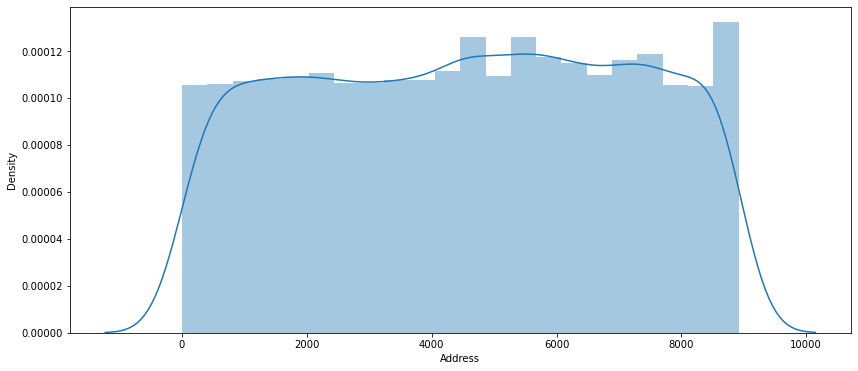

In [109]:
sns.distplot(zr_g1['Address'])
plt.show()

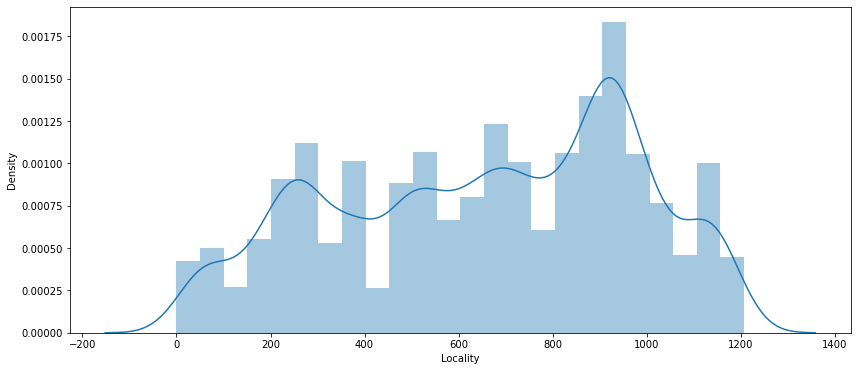

In [110]:
sns.distplot(zr_g1['Locality'])
plt.show()

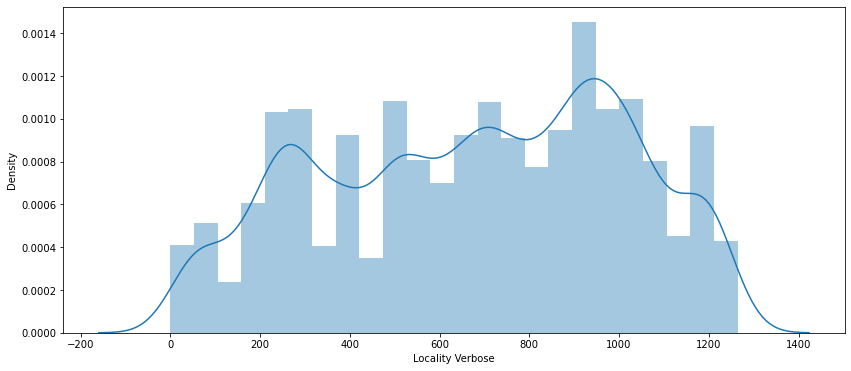

In [111]:
sns.distplot(zr_g1['Locality Verbose'])
plt.show()

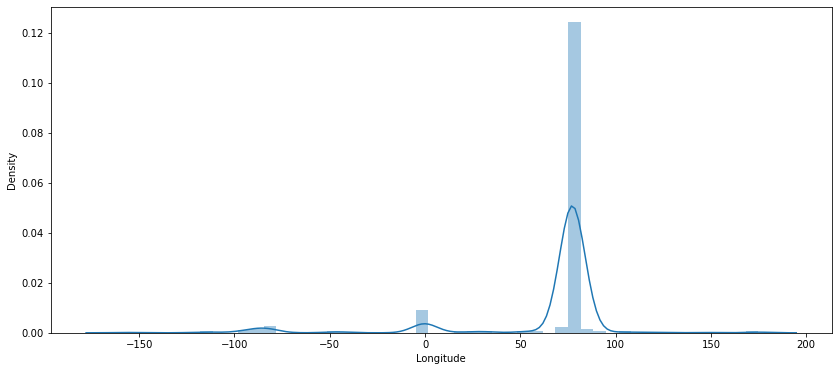

In [112]:
sns.distplot(zr_g1['Longitude'])
plt.show()

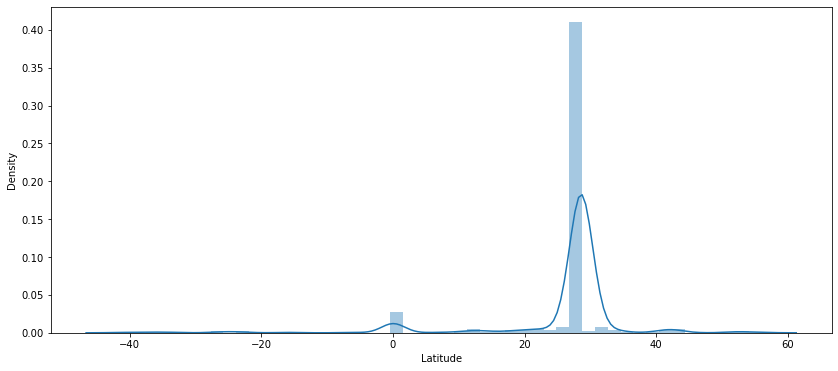

In [113]:
sns.distplot(zr_g1['Latitude'])
plt.show()

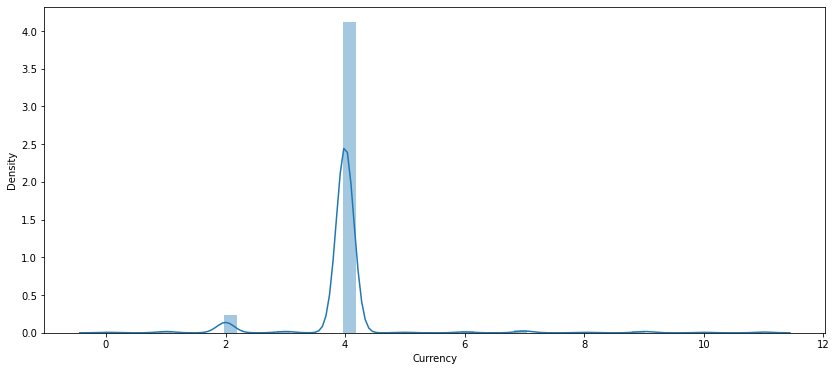

In [114]:
sns.distplot(zr_g1['Currency'])
plt.show()

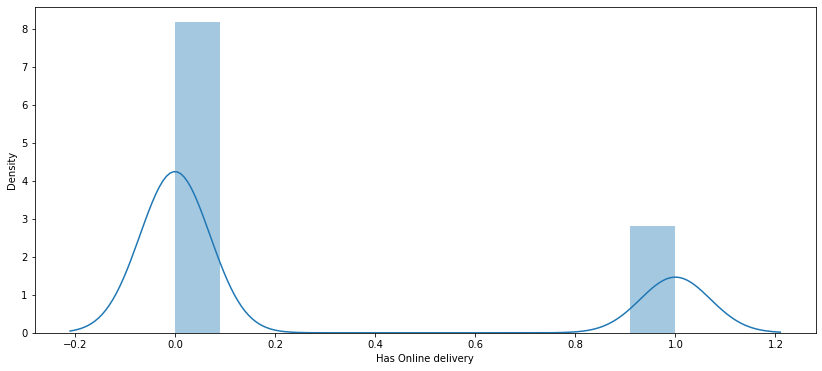

In [115]:
sns.distplot(zr_g1['Has Online delivery'])
plt.show()

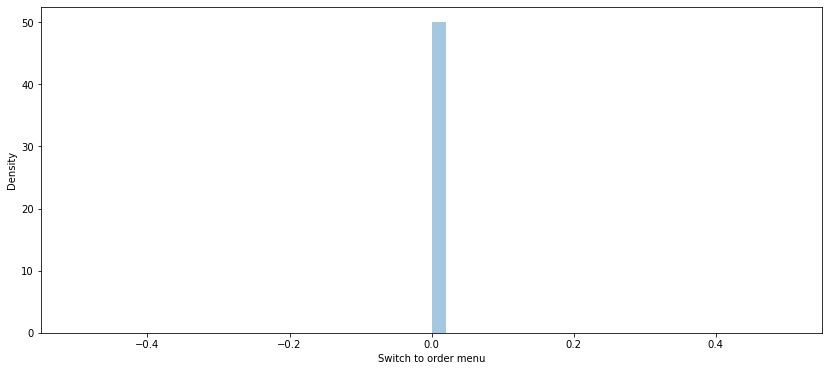

In [116]:
sns.distplot(zr_g1['Switch to order menu'])
plt.show()

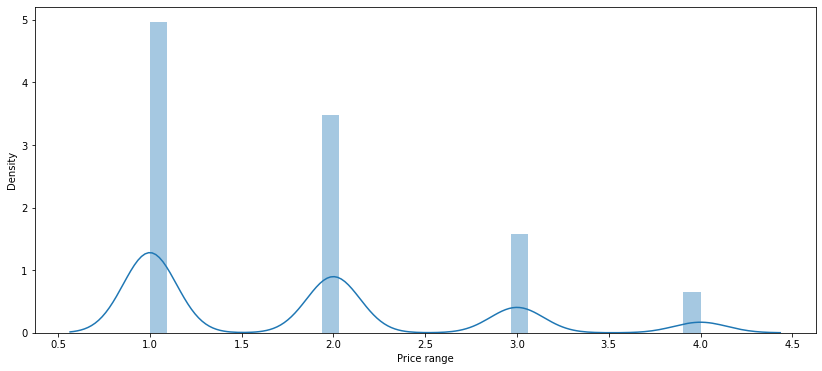

In [117]:
sns.distplot(zr_g1['Price range'])
plt.show()

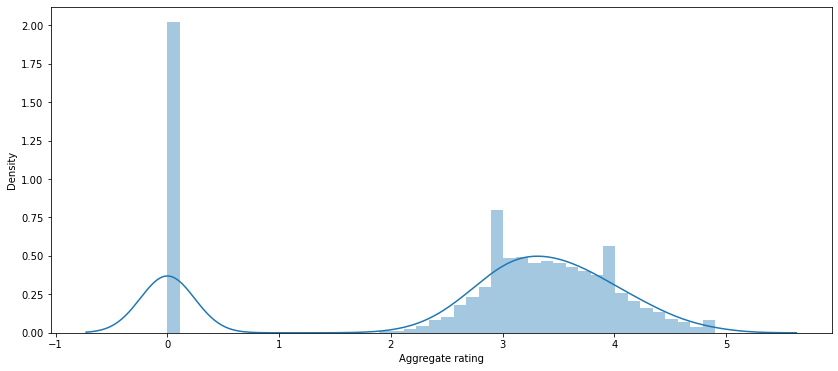

In [119]:
sns.distplot(zr_g1['Aggregate rating'])
plt.show()

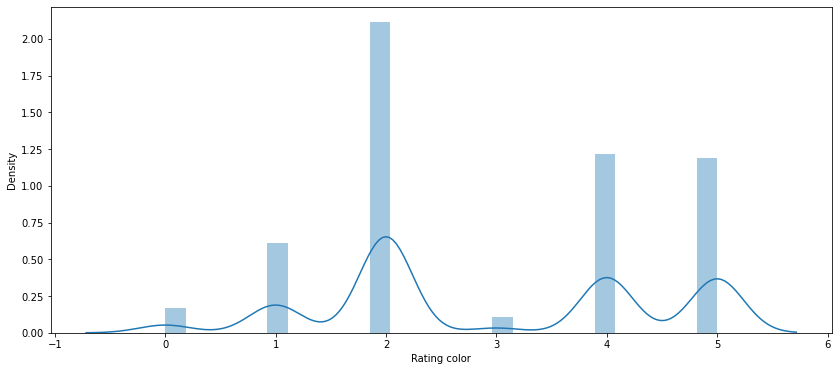

In [120]:
sns.distplot(zr_g1['Rating color'])
plt.show()

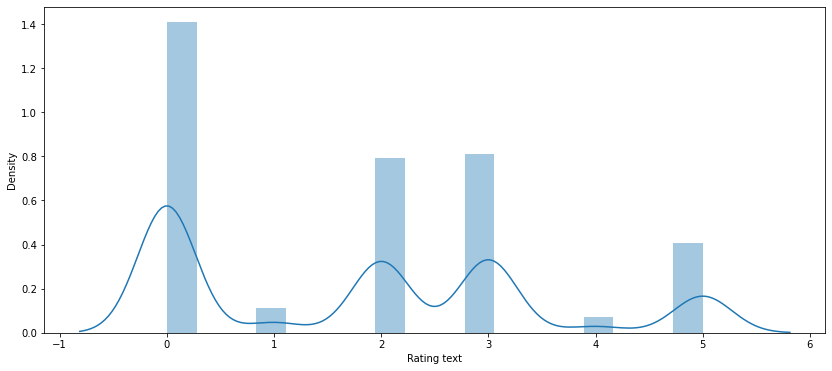

In [121]:
sns.distplot(zr_g1['Rating text'])
plt.show()

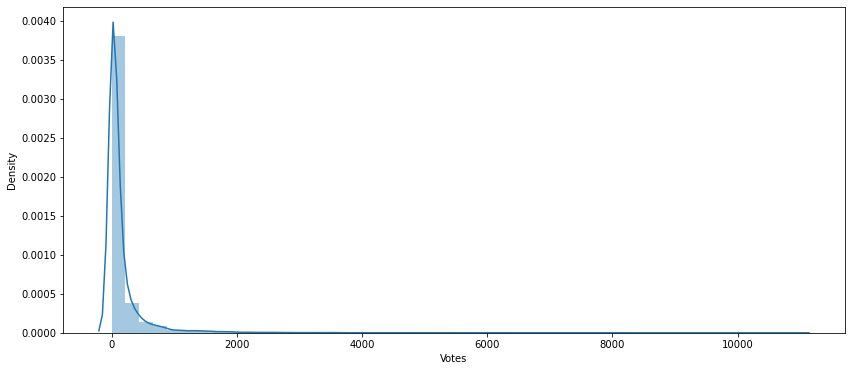

In [122]:
sns.distplot(zr_g1['Votes'])
plt.show()

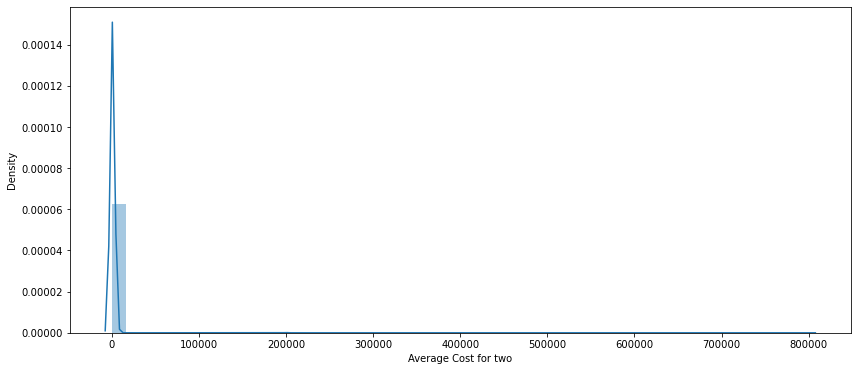

In [123]:
sns.distplot(zr_g1['Average Cost for two'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

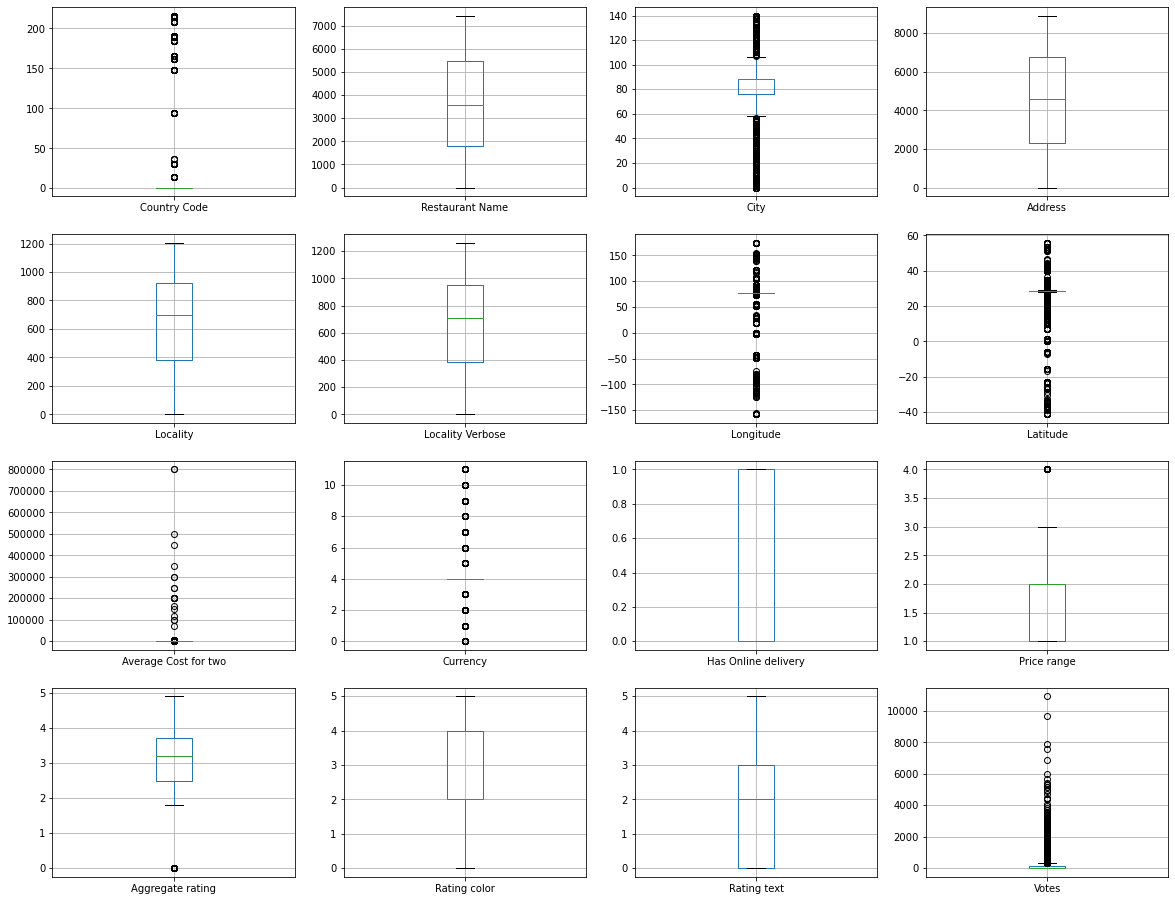

In [12]:
# Outliers Removal:-

zr_g1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(zr_g1))
z

array([[3.06015126e-01, 2.11033874e-01, 3.33228868e+00, ...,
        1.37116966e+00, 1.24686228e-01, 3.93115898e-02],
       [3.06015126e-01, 7.50322543e-01, 3.33228868e+00, ...,
        1.37116966e+00, 1.24686228e-01, 1.99722008e-01],
       [3.06015126e-01, 1.52407446e+00, 3.33228868e+00, ...,
        1.37116966e+00, 1.24686228e-01, 1.46251869e-01],
       ...,
       [3.48269305e+00, 1.53620808e+00, 2.44414596e+00, ...,
        1.37116966e+00, 1.24686228e-01, 2.11497108e-03],
       [3.48269305e+00, 1.50727405e+00, 2.48725368e+00, ...,
        1.37116966e+00, 1.24686228e-01, 2.11497108e-03],
       [3.48269305e+00, 6.11910166e-01, 2.57346912e+00, ...,
        6.38247498e-01, 1.05556963e+00, 3.27585385e-01]])

In [14]:
# index no.

np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([2, 2, 2, ..., 6, 0, 6], dtype=int64))

In [15]:
zrg1_new=zr_g1[(z<3).all(axis=1)]
zrg1_new

,Country Code,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
82,1,3585,11,1097,19,19,75.346017,19.876219,800,4,0,3,3.6,5,2,240
83,1,617,11,7535,187,188,0.000000,0.000000,850,4,0,3,3.3,2,0,65
84,1,354,11,7516,150,151,75.353942,19.874733,600,4,0,2,3.3,2,0,63
85,1,2099,11,2896,150,151,75.340775,19.876106,700,4,0,2,3.1,2,0,19
86,1,3010,11,5302,150,151,75.367127,19.875522,350,4,0,2,3.4,2,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,3085,118,2727,722,733,103.858430,1.301707,60,2,0,4,3.2,2,0,32
8859,184,6150,118,8670,852,865,103.839165,1.290084,95,2,0,4,3.2,2,0,30
8860,184,451,118,811,1026,1079,103.858181,1.303035,50,2,0,3,3.8,5,2,28
8861,184,868,118,373,1050,1103,103.848254,1.281970,40,2,0,3,3.9,5,2,35


In [16]:
zr_g1.shape

(9551, 16)

In [17]:
zrg1_new.shape

(8442, 16)

In [19]:
# percentage data loss:-

loss_percent=(9551-8442)/(9551*100)
print(loss_percent,'%')

0.0011611349596900849 %


In [18]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(zr_g1,method='yeo-johnson')
X1

array([[-0.32234518, -0.09127121, -2.32505866, ...,  1.32362428,
         0.37685986,  0.79148481],
       [-0.32234518,  0.77023873, -2.32505866, ...,  1.32362428,
         0.37685986,  0.45845984],
       [-0.32234518,  1.38573006, -2.32505866, ...,  1.32362428,
         0.37685986,  0.59562488],
       ...,
       [ 3.10331548,  1.39497902,  3.46946741, ...,  1.32362428,
         0.37685986,  0.84489311],
       [ 3.10331548,  1.37290548,  3.54675338, ...,  1.32362428,
         0.37685986,  0.84489311],
       [ 3.10331548, -0.50138963,  3.70269563, ..., -0.59645668,
        -1.16350271, -0.25138855]])

In [19]:
X1.ndim

2

In [20]:
X1.std()

1.0

In [21]:
x=zrg1_new.drop(['Average Cost for two'],axis=1)
x

,Country Code,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Currency,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
82,1,3585,11,1097,19,19,75.346017,19.876219,4,0,3,3.6,5,2,240
83,1,617,11,7535,187,188,0.000000,0.000000,4,0,3,3.3,2,0,65
84,1,354,11,7516,150,151,75.353942,19.874733,4,0,2,3.3,2,0,63
85,1,2099,11,2896,150,151,75.340775,19.876106,4,0,2,3.1,2,0,19
86,1,3010,11,5302,150,151,75.367127,19.875522,4,0,2,3.4,2,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,3085,118,2727,722,733,103.858430,1.301707,2,0,4,3.2,2,0,32
8859,184,6150,118,8670,852,865,103.839165,1.290084,2,0,4,3.2,2,0,30
8860,184,451,118,811,1026,1079,103.858181,1.303035,2,0,3,3.8,5,2,28
8861,184,868,118,373,1050,1103,103.848254,1.281970,2,0,3,3.9,5,2,35


In [22]:
y=zrg1_new['Average Cost for two']
y

82      800
83      850
84      600
85      700
86      350
       ... 
8858     60
8859     95
8860     50
8861     40
8862     75
Name: Average Cost for two, Length: 8442, dtype: int64

# Machine Learning Algorithms Training and Testing of Average Cost for two:-

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [24]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.7153326224857492
At random state test {0} 0.7447354382760418


Mean-squared-error:  71401.86805391056
Mean-absolute-error:  177.03608784267286
Root-Mean-squared-error:  267.2112798029128
R2 SCore:  0.7447354382760418
At random state train {1} 0.7207077449091513
At random state test {1} 0.7164162234463788


Mean-squared-error:  83615.30252487992
Mean-absolute-error:  176.07569212982125
Root-Mean-squared-error:  289.1631071296612
R2 SCore:  0.7164162234463788
At random state train {2} 0.729044394771051
At random state test {2} 0.6910857667596104


Mean-squared-error:  124185.52690196641
Mean-absolute-error:  189.85096105420956
Root-Mean-squared-error:  352.3996692705122
R2 SCore:  0.6910857667596104
At random state train {3} 0.717902268470792
At random state test {3} 0.7289777594060884


Mean-squared-error:  97419.61380918328
Mean-absolute-error:  184.54393405298183
Root-Mean-squared-error:  312.1211524539522
R2 SCore:  0.7289777594060884
At random state train

In [25]:
print('Best accuraccy(R2 Score) is ',0.767, 'on random_state',78)

Best accuraccy(R2 Score) is  0.767 on random_state 78


In [26]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=78)

In [27]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 70.49567904951452
Mean-squared-error:  123413.9749437471
Mean-absolute-error:  186.44038118633648
Root-Mean-squared-error:  351.30325211097477


In [28]:
#lasso regression;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 70.48044268169104
Mean-squared-error:  123477.70732789369
Mean-absolute-error:  186.42917239481775
Root-Mean-squared-error:  351.3939489062008


In [29]:
#Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 77.87620416112817
Mean-squared-error:  92541.88869153346
Mean-absolute-error:  156.61338069863825
Root-Mean-squared-error:  304.20698330500807


In [30]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 85.19976775064488
Mean-squared-error:  61908.067467436354
Mean-absolute-error:  128.58031379514506
Root-Mean-squared-error:  248.81331850895032


In [31]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 81.75435720313102
Mean-squared-error:  76319.9162164855
Mean-absolute-error:  145.68219469850783
Root-Mean-squared-error:  276.26059475879924


Therefore, Random Forest Regressor shows the best metrics results among other models.

In [32]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [0.69823597 0.75749136 0.7682954  0.7249168  0.74898129 0.73906917
 0.75771719 0.60858528 0.36319646]
Mean of Cross validation score: 0.6851654352748469
R2 Score 70.49567904951452


In [33]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x,y,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [0.69838408 0.75807161 0.76803258 0.72512129 0.74906244 0.73866787
 0.75742811 0.60903412 0.37472219]
Mean of Cross validation score: 0.6865026999730259
R2 Score 70.48044268169104


In [34]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x,y,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [0.70660643 0.76311342 0.74692341 0.7990781  0.54743544 0.75217781
 0.79418711 0.75788136 0.0822971 ]
Mean of Cross validation score: 0.6610777984720593
R2 Score 77.87620416112817


In [35]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x,y,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [0.79275151 0.80400662 0.85617736 0.81690218 0.86486524 0.85123451
 0.88430901 0.83227563 0.37884247]
Mean of Cross validation score: 0.7868182802478206
R2 Score 85.19976775064488


In [36]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x,y,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [ 0.7718798   0.79924588  0.84577658  0.82577828  0.72017432  0.69672509
  0.86091817  0.84174373 -0.30926848]
Mean of Cross validation score: 0.6725525967884761
R2 Score 81.75435720313102


Therefore the difference between cv score and r2 score in case of Random Forest Regressor that is [0.8519-0.8512=0.0007.],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [37]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[100,150,200],
            'criterion':['mse','mae']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [38]:
rf=RandomForestRegressor(criterion='mae',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=6)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8483066794154004
R2_Score 0.8350904730395685
Cross_Val_Score 84.83066794154004


Therefore,we are getting our model accuracy 84% with almost same cross-validation score which shows that there is a 
less difference between CV score and Accuracy(R2_Score) score. So,our model is performing "good enough".

# Saving the Model_1:-

In [39]:
import pickle
filename='Zomato_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [40]:
loaded_model=pickle.load(open('Zomato_Pred.pkl','rb'))

In [41]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688
Predicted,299.0,256.5,257.0,591.0,293.5,566.5,591.0,1393.75,358.5,260.0,...,321.0,602.0,3129.25,299.0,1169.5,296.0,263.5,600.0,259.5,2373.25
Original,299.0,256.5,257.0,591.0,293.5,566.5,591.0,1393.75,358.5,260.0,...,321.0,602.0,3129.25,299.0,1169.5,296.0,263.5,600.0,259.5,2373.25


In [42]:
conclusion.transpose()

,Predicted,Original
0,299.00,299.00
1,256.50,256.50
2,257.00,257.00
3,591.00,591.00
4,293.50,293.50
...,...,...
1684,296.00,296.00
1685,263.50,263.50
1686,600.00,600.00
1687,259.50,259.50


In [43]:
# 2. Checking the Correlation with respect to first target variable(Price range ):-

zr.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Restaurant ID          -0.134540
Locality               -0.114457
Locality Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Switch to order menu         NaN
Name: Price range, dtype: float64

Therefore, 'Longitude','Address','Cuisines','Is delivering now','Restaurant Name','Average Cost for two','Currency' and 
'Has Online delivery' are less correlated with the target variable 'Price range'.

Making new dataframe in terms of Price range analysis:-

In [45]:
zr_g2=zr.drop(['Longitude','Address','Cuisines','Is delivering now','Restaurant Name','Average Cost for two','Currency', 
               'Has Online delivery','Switch to order menu'],axis=1)
zr_g2

,Country Code,Country,Restaurant ID,City,Locality,Locality Verbose,Latitude,Has Table booking,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,3400025,1,17,17,27.161661,0,3,3.9,5,2,140
1,1,3,3400341,1,17,17,0.000000,0,2,3.5,5,2,71
2,1,3,3400005,1,17,17,27.160832,0,2,3.6,5,2,94
3,1,3,3400021,1,204,205,27.195928,0,2,4.0,1,5,87
4,1,3,3400017,1,204,205,27.201725,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14,17697389,135,1174,1231,42.498400,0,1,3.7,5,2,101
9547,216,14,17697424,135,1174,1231,42.497919,0,1,3.5,5,2,58
9548,216,14,17697332,135,1174,1231,42.465580,0,2,3.9,5,2,156
9549,216,14,17694056,136,1176,1233,40.396043,0,2,3.9,5,2,156


In [46]:
zr_g2.shape

(9551, 13)

In [47]:
# checking for the skewness:-

zr_g2.skew()

Country Code         3.043965
Country              3.312721
Restaurant ID        0.061570
City                -1.193777
Locality            -0.253550
Locality Verbose    -0.183059
Latitude            -3.081635
Has Table booking    2.321100
Price range          0.889618
Aggregate rating    -0.954130
Rating color         0.046009
Rating text          0.431408
Votes                8.807637
dtype: float64

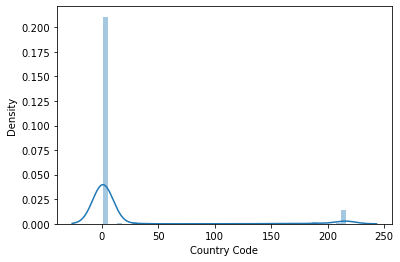

In [48]:
# checking with the distribution curve:-

sns.distplot(zr_g2['Country Code'])
plt.show()

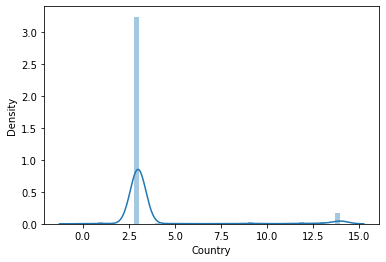

In [49]:
sns.distplot(zr_g2['Country'])
plt.show()

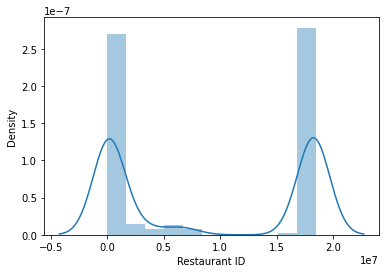

In [50]:
sns.distplot(zr_g2['Restaurant ID'])
plt.show()

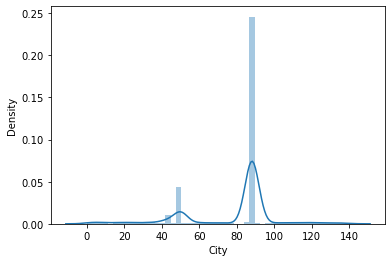

In [51]:
sns.distplot(zr_g2['City'])
plt.show()

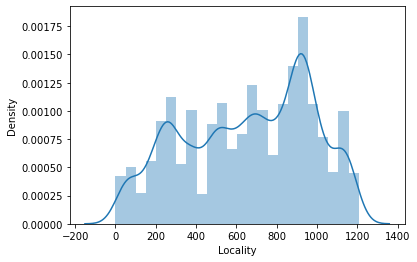

In [52]:
sns.distplot(zr_g2['Locality'])
plt.show()

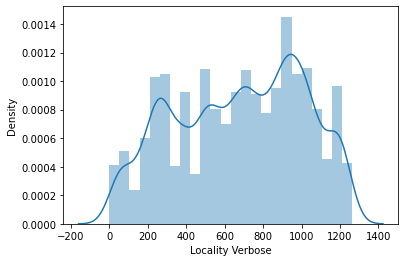

In [53]:
sns.distplot(zr_g2['Locality Verbose'])
plt.show()

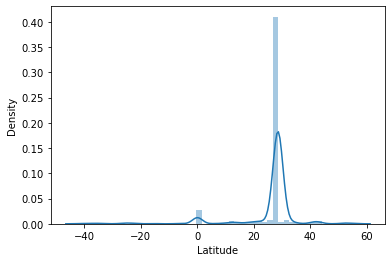

In [54]:
sns.distplot(zr_g2['Latitude'])
plt.show()

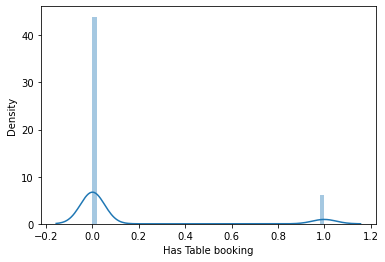

In [55]:
sns.distplot(zr_g2['Has Table booking'])
plt.show()

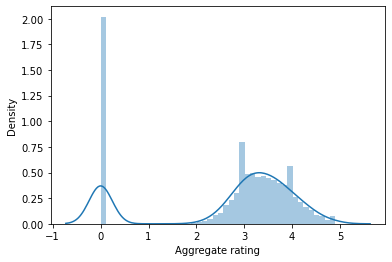

In [56]:
sns.distplot(zr_g2['Aggregate rating'])
plt.show()

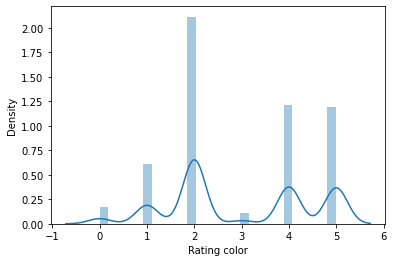

In [57]:
sns.distplot(zr_g2['Rating color'])
plt.show()

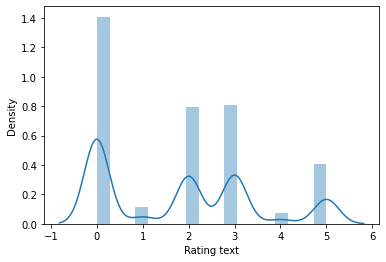

In [58]:
sns.distplot(zr_g2['Rating text'])
plt.show()

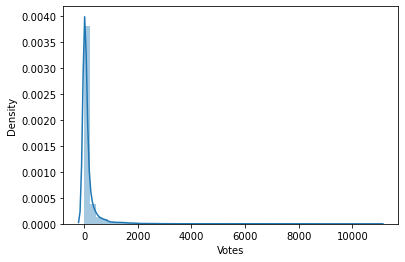

In [59]:
sns.distplot(zr_g2['Votes'])
plt.show()

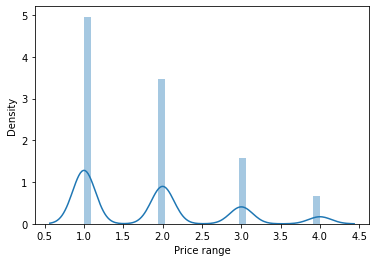

In [60]:
sns.distplot(zr_g2['Price range'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

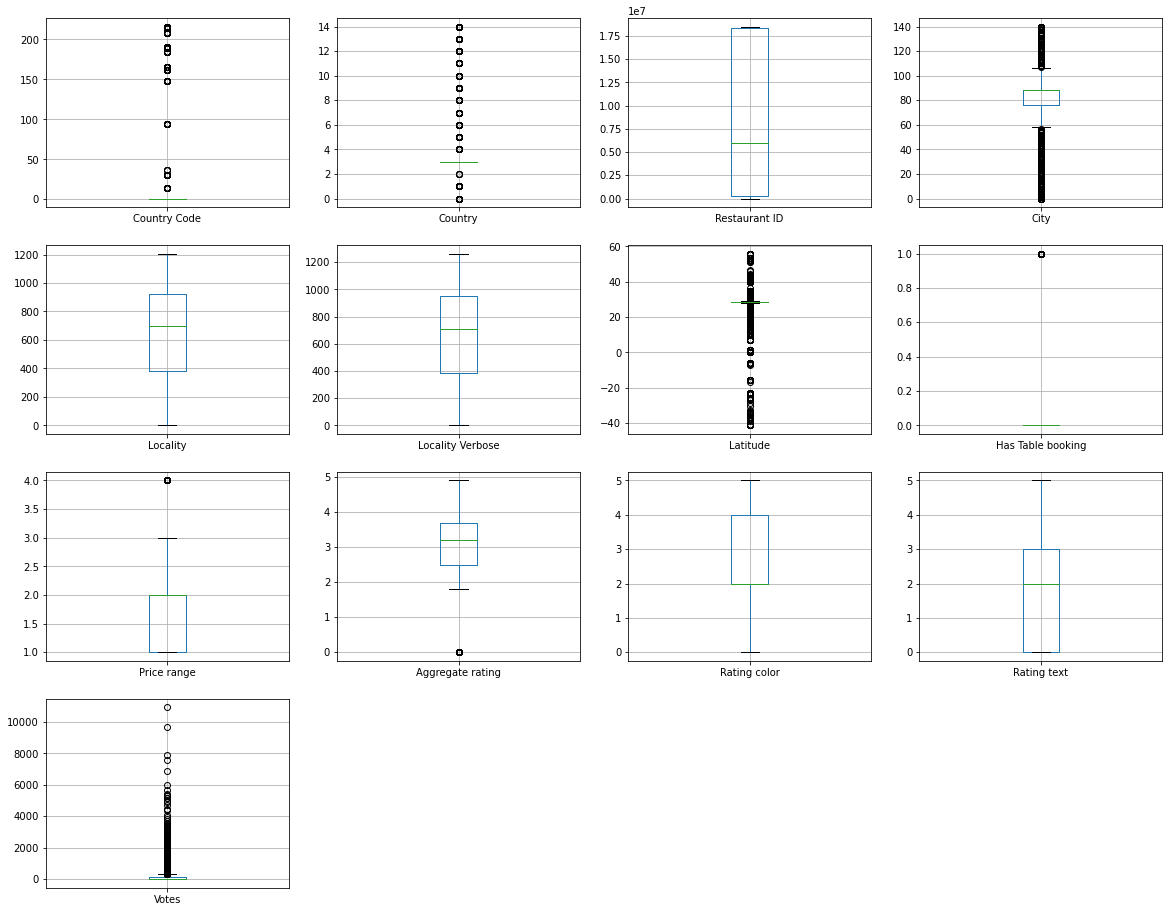

In [61]:
# Outliers Removal:-

zr_g2.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(zr_g2))
z

array([[3.06015126e-01, 2.77839497e-01, 6.42823811e-01, ...,
        1.37116966e+00, 1.24686228e-01, 3.93115898e-02],
       [3.06015126e-01, 2.77839497e-01, 6.42787865e-01, ...,
        1.37116966e+00, 1.24686228e-01, 1.99722008e-01],
       [3.06015126e-01, 2.77839497e-01, 6.42826086e-01, ...,
        1.37116966e+00, 1.24686228e-01, 1.46251869e-01],
       ...,
       [3.48269305e+00, 3.87024852e+00, 9.83522196e-01, ...,
        1.37116966e+00, 1.24686228e-01, 2.11497108e-03],
       [3.48269305e+00, 3.87024852e+00, 9.83149545e-01, ...,
        1.37116966e+00, 1.24686228e-01, 2.11497108e-03],
       [3.48269305e+00, 3.87024852e+00, 9.67876872e-01, ...,
        6.38247498e-01, 1.05556963e+00, 3.27585385e-01]])

In [63]:
# index no.

np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([3, 3, 3, ..., 1, 0, 1], dtype=int64))

In [64]:
zrg2_new=zr_g2[(z<3).all(axis=1)]
zrg2_new

,Country Code,Country,Restaurant ID,City,Locality,Locality Verbose,Latitude,Has Table booking,Price range,Aggregate rating,Rating color,Rating text,Votes
82,1,3,2500023,11,19,19,19.876219,0,3,3.6,5,2,240
83,1,3,2500076,11,187,188,0.000000,0,3,3.3,2,0,65
84,1,3,2500054,11,150,151,19.874733,0,2,3.3,2,0,63
85,1,3,2500134,11,150,151,19.876106,0,2,3.1,2,0,19
86,1,3,2500069,11,150,151,19.875522,0,2,3.4,2,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,8,18479742,118,722,733,1.301707,0,4,3.2,2,0,32
8859,184,8,18482938,118,852,865,1.290084,0,4,3.2,2,0,30
8860,184,8,18483082,118,1026,1079,1.303035,0,3,3.8,5,2,28
8861,184,8,18483446,118,1050,1103,1.281970,0,3,3.9,5,2,35


In [65]:
zr_g2.shape

(9551, 13)

In [66]:
zrg2_new.shape

(8504, 13)

In [67]:
# percentage data loss:-

loss_percent=(9551-8504)/(9551*100)
print(loss_percent,'%')

0.001096220291068998 %


In [68]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X2=power_transform(zr_g2,method='yeo-johnson')
X2

array([[-0.32234518, -0.18994541,  0.14005679, ...,  1.32362428,
         0.37685986,  0.79148481],
       [-0.32234518, -0.18994541,  0.14009529, ...,  1.32362428,
         0.37685986,  0.45845984],
       [-0.32234518, -0.18994541,  0.14005435, ...,  1.32362428,
         0.37685986,  0.59562488],
       ...,
       [ 3.10331548,  2.94974586,  0.93637249, ...,  1.32362428,
         0.37685986,  0.84489311],
       [ 3.10331548,  2.94974586,  0.93626911, ...,  1.32362428,
         0.37685986,  0.84489311],
       [ 3.10331548,  2.94974586,  0.93201872, ..., -0.59645668,
        -1.16350271, -0.25138855]])

In [69]:
X2.ndim

2

In [71]:
X2.std()

1.0

In [85]:
x1=np.abs(zrg2_new.drop(['Price range'],axis=1))
x1

,Country Code,Country,Restaurant ID,City,Locality,Locality Verbose,Latitude,Has Table booking,Aggregate rating,Rating color,Rating text,Votes
82,1,3,2500023,11,19,19,19.876219,0,3.6,5,2,240
83,1,3,2500076,11,187,188,0.000000,0,3.3,2,0,65
84,1,3,2500054,11,150,151,19.874733,0,3.3,2,0,63
85,1,3,2500134,11,150,151,19.876106,0,3.1,2,0,19
86,1,3,2500069,11,150,151,19.875522,0,3.4,2,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,8,18479742,118,722,733,1.301707,0,3.2,2,0,32
8859,184,8,18482938,118,852,865,1.290084,0,3.2,2,0,30
8860,184,8,18483082,118,1026,1079,1.303035,0,3.8,5,2,28
8861,184,8,18483446,118,1050,1103,1.281970,0,3.9,5,2,35


In [86]:
y1=zrg2_new['Price range']
y1

82      3
83      3
84      2
85      2
86      2
       ..
8858    4
8859    4
8860    3
8861    3
8862    4
Name: Price range, Length: 8504, dtype: int64

# Machine Learning Algorithms Training and Testing of Price range:-

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State:-

In [88]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

mnb=MultinomialNB()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    pred_mnb=mnb.predict(x_test)
    acc=accuracy_score(y_test,pred_mnb)
    print('accuracy',acc,'random_state',i)
    print('\n')
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.33098177542621987 random_state 0


max_accuracy 0.33098177542621987 max_random_state 0
accuracy 0.30922986478542036 random_state 1


accuracy 0.31099353321575546 random_state 2


accuracy 0.30864197530864196 random_state 3


accuracy 0.3315696649029982 random_state 4


max_accuracy 0.3315696649029982 max_random_state 4
accuracy 0.32157554379776604 random_state 5


accuracy 0.3239271017048795 random_state 6


accuracy 0.2998236331569665 random_state 7


accuracy 0.31040564373897706 random_state 8


accuracy 0.3062904174015285 random_state 9


accuracy 0.30511463844797176 random_state 10


accuracy 0.3221634332745444 random_state 11


accuracy 0.3098177542621987 random_state 12


accuracy 0.3262786596119929 random_state 13


accuracy 0.32275132275132273 random_state 14


accuracy 0.3286302175191064 random_state 15


accuracy 0.3115814226925338 random_state 16


accuracy 0.3186360964138742 random_state 17


accuracy 0.3203997648442093 random_state 18


accuracy 0.32333921222810

In [89]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.3445032333921223 on Random_state 93


In [90]:
# Naive Bayes Classifier;

mnb=MultinomialNB()

mnb.fit(x_train,y_train)
pred_mnb=mnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

Accuracy 31.746031746031743
[[467   0   3 392]
 [244   4  14 311]
 [ 63   4  19 110]
 [ 14   2   4  50]]
              precision    recall  f1-score   support

           1       0.59      0.54      0.57       862
           2       0.40      0.01      0.01       573
           3       0.47      0.10      0.16       196
           4       0.06      0.71      0.11        70

    accuracy                           0.32      1701
   macro avg       0.38      0.34      0.21      1701
weighted avg       0.49      0.32      0.31      1701



In [91]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 52.2633744855967
[[858   4   0   0]
 [542  31   0   0]
 [174  22   0   0]
 [ 57  13   0   0]]
              precision    recall  f1-score   support

           1       0.53      1.00      0.69       862
           2       0.44      0.05      0.10       573
           3       0.00      0.00      0.00       196
           4       0.00      0.00      0.00        70

    accuracy                           0.52      1701
   macro avg       0.24      0.26      0.20      1701
weighted avg       0.42      0.52      0.38      1701



In [92]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 57.73074661963551
[[581 260  19   2]
 [224 269  70  10]
 [ 19  52 108  17]
 [  6  15  25  24]]
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       862
           2       0.45      0.47      0.46       573
           3       0.49      0.55      0.52       196
           4       0.45      0.34      0.39        70

    accuracy                           0.58      1701
   macro avg       0.52      0.51      0.51      1701
weighted avg       0.58      0.58      0.58      1701



In [93]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 65.72604350382129
[[681 173   8   0]
 [229 287  54   3]
 [  9  51 123  13]
 [  5  16  22  27]]
              precision    recall  f1-score   support

           1       0.74      0.79      0.76       862
           2       0.54      0.50      0.52       573
           3       0.59      0.63      0.61       196
           4       0.63      0.39      0.48        70

    accuracy                           0.66      1701
   macro avg       0.63      0.58      0.59      1701
weighted avg       0.65      0.66      0.65      1701



In [94]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 62.257495590828924
[[744 108   8   2]
 [302 202  38  31]
 [ 11  42  79  64]
 [  4  17  15  34]]
              precision    recall  f1-score   support

           1       0.70      0.86      0.77       862
           2       0.55      0.35      0.43       573
           3       0.56      0.40      0.47       196
           4       0.26      0.49      0.34        70

    accuracy                           0.62      1701
   macro avg       0.52      0.53      0.50      1701
weighted avg       0.62      0.62      0.60      1701



Therefore, Random Forest Classifier shows the best metrics results among other models.

In [95]:
# Cross Validation for Naive Bayes Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(mnb,x1,y1,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)

Cross validation score of Logistic Regression model: [0.33544974 0.28571429 0.32486772 0.26666667 0.31746032 0.27724868
 0.31534392 0.32910053 0.40042373]
Mean of Cross validation score: 0.3169195089628235
Accuracy 31.746031746031743


In [96]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x1,y1,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.54179894 0.4973545  0.53862434 0.5026455  0.5026455  0.5026455
 0.5026455  0.5037037  0.53813559]
Mean of Cross validation score: 0.5144665650315369
Accuracy 52.2633744855967


In [97]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x1,y1,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.2952381  0.2952381  0.24550265 0.26772487 0.39047619 0.53650794
 0.52275132 0.50899471 0.27860169]
Mean of Cross validation score: 0.37122617303879074
Accuracy 57.73074661963551


In [98]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x1,y1,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.33121693 0.31111111 0.15978836 0.2021164  0.28677249 0.51851852
 0.63809524 0.55661376 0.35063559]
Mean of Cross validation score: 0.3727631552725715
Accuracy 65.72604350382129


In [99]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x1,y1,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.44338624 0.37989418 0.53439153 0.53121693 0.6042328  0.57248677
 0.61269841 0.57248677 0.51271186]
Mean of Cross validation score: 0.5292783905778256
Accuracy 62.257495590828924


Therefore the difference between cv score and accuracy score in very less in case of Random Forest Classifier that is[0.657-0.638=0.019],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [100]:
RandomForestClassifier()

RandomForestClassifier()

In [101]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400]}

In [102]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=7,
                scoring=accuracy_score)

In [103]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [105]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x1,y1,cv=7)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.6500073496986624
Accuracy_Score 0.649617871840094
Cross_Val_Score 65.00073496986623


In [106]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

Therefore,we are getting our model accuracy 65% with almost same cross-validation score which shows that there is a 
less difference between CV score and Accuracy score. So,our model is performing "good enough".

# Saving the Model_2:-

In [107]:
import pickle
filename='Price_range_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [109]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Price_range_Prediction=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Price_range_Prediction

,original,predicted
0,1,1
1,2,1
2,2,2
3,2,3
4,1,1
...,...,...
1696,1,1
1697,3,3
1698,2,2
1699,1,1


(1.a)-In Model-1 of this project, we build various models like linear regression, lasso regression, decision tree regressor,
      random forest regressor and adaboost regressor.

(1.b)-A hyperparameter tuned random forest regressor gives the highest accuracy score of 84% with almost same cross-validation score.




(2.a)-In Model-2 of this project, we build various models like naive bayes classifier, support vector classifier, decision 
      tree classifier, random forest classifier and adaboost classifier.

(2.b)-A hyperparameter tuned random forest classifier gives the highest accuracy score of 65% with almost same cross-validation score.

Insights:-
    

1. This analysis gave us the idea about the most rated countries, cities and restraunts across the world and their 
   contributions.


2. Data analysis shows that zomato has maaximum records or transactions from 'India' after 'USA' and 'UK', also 
   the contributions of Indian customer is high in terms of rating. 'Indian' and 'Chinese' cuisines are liked by maximum 
   number of people. The most top rated restraunts are also from india as compared to other countries and talking about 
   the cities in terms of best restraunts,'New Delhi' has highest/top rated restraunts followed by 'Bangalore' and 'Gurgaon'.